# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load Data

In [2]:
df1 = pd.read_csv("/content/QVI_purchase_behaviour.csv")
df2 = pd.read_excel("/content/QVI_transaction_data.xlsx")

In [3]:
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [4]:
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [5]:
df = pd.merge(df2, df1, on='LYLTY_CARD_NBR', how='inner')
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


# Data exploration

In [6]:
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [8]:
df.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [9]:
missing_values = df.isnull().sum()
filtered_df = missing_values [missing_values  > 0]
filtered_df = pd.DataFrame(filtered_df)
filtered_df


,0


<Axes: >

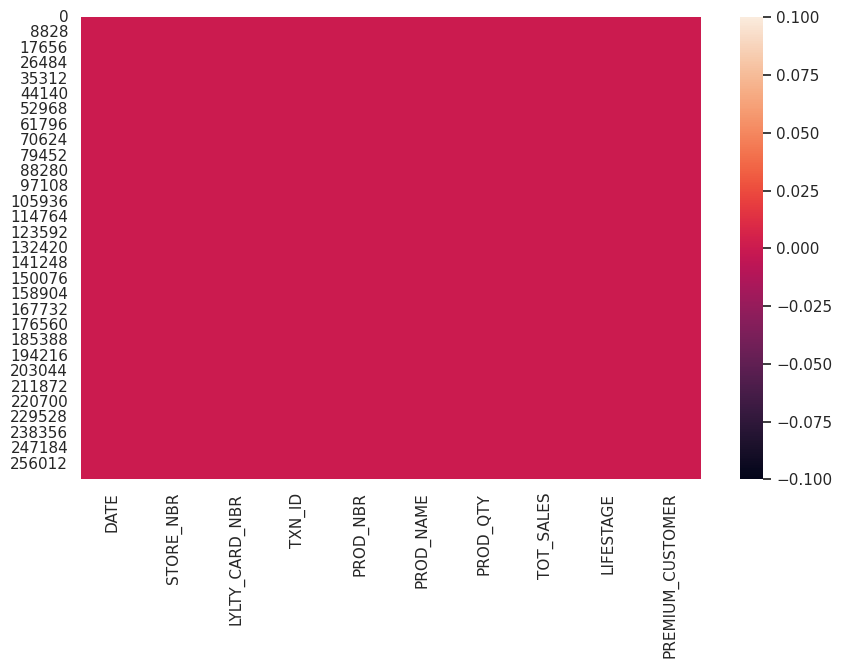

In [10]:
sns.heatmap(df.isnull())

In [11]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 1


# Data processing

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
print("Duplicate Rows:", df.duplicated().sum())

Duplicate Rows: 0


In [14]:
df['DATE'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df['DATE'], unit='D')
print(df[['DATE']].head())

        DATE
0 2018-10-17
1 2019-05-14
2 2019-05-20
3 2018-08-17
4 2018-08-18


In [15]:
columns_to_check = ['TOT_SALES', 'PROD_QTY']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"\nOutliers in column {col}: {len(outliers)} rows")
    print(outliers[[col]].describe())

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



Outliers in column TOT_SALES: 578 rows
        TOT_SALES
count  578.000000
mean    21.899740
std     37.227518
min     15.000000
25%     16.800000
50%     18.500000
75%     22.000000
max    650.000000

Outliers in column PROD_QTY: 28219 rows
           PROD_QTY
count  28219.000000
mean       1.066126
std        0.431280
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000


In [16]:
columns_to_check = ['TOT_SALES', 'PROD_QTY']

for col in columns_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if outliers.empty:
        print(f"No outliers remaining in column {col}.")
    else:
        print(f"There are still {len(outliers)} outliers in column {col}.")
        print(outliers[[col]].describe())


No outliers remaining in column TOT_SALES.
No outliers remaining in column PROD_QTY.


In [17]:
df['PACK_SIZE'] = df['PROD_NAME'].str.extract(r'(\d+)(?=g)')
df['PACK_SIZE'] = df['PACK_SIZE'].astype(float)

df['BRAND'] = df['PROD_NAME'].str.split().str[0]

In [18]:
df['CUSTOMER_SEGMENT'] = df['LIFESTAGE'] + ' - ' + df['PREMIUM_CUSTOMER']

# data analysis

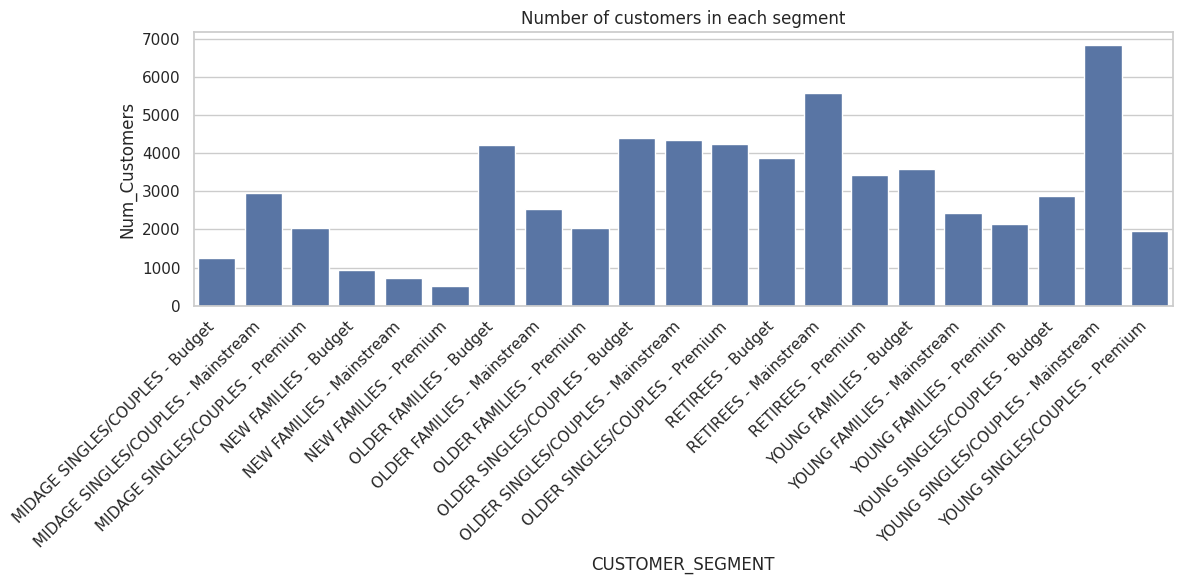

In [19]:
unique_customers = df.groupby('CUSTOMER_SEGMENT')['LYLTY_CARD_NBR'].nunique().reset_index()
unique_customers.rename(columns={'LYLTY_CARD_NBR': 'Num_Customers'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=unique_customers, x='CUSTOMER_SEGMENT', y='Num_Customers')
plt.title('Number of customers in each segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


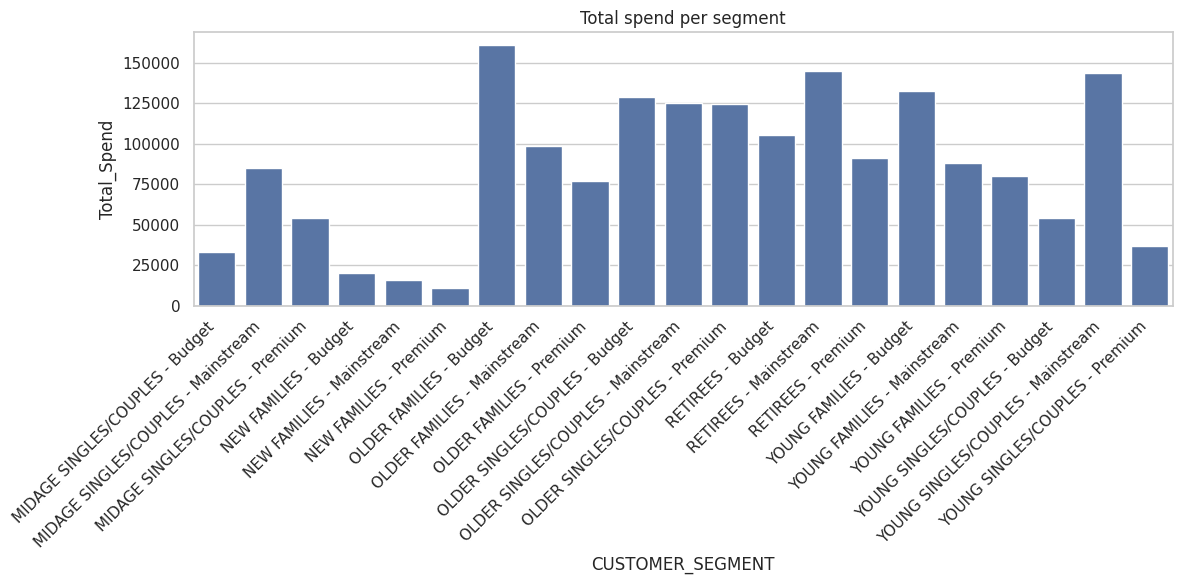

In [20]:
total_spend = df.groupby('CUSTOMER_SEGMENT')['TOT_SALES'].sum().reset_index(name='Total_Spend')

plt.figure(figsize=(12, 6))
sns.barplot(data=total_spend, x='CUSTOMER_SEGMENT', y='Total_Spend')
plt.title('Total spend per segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


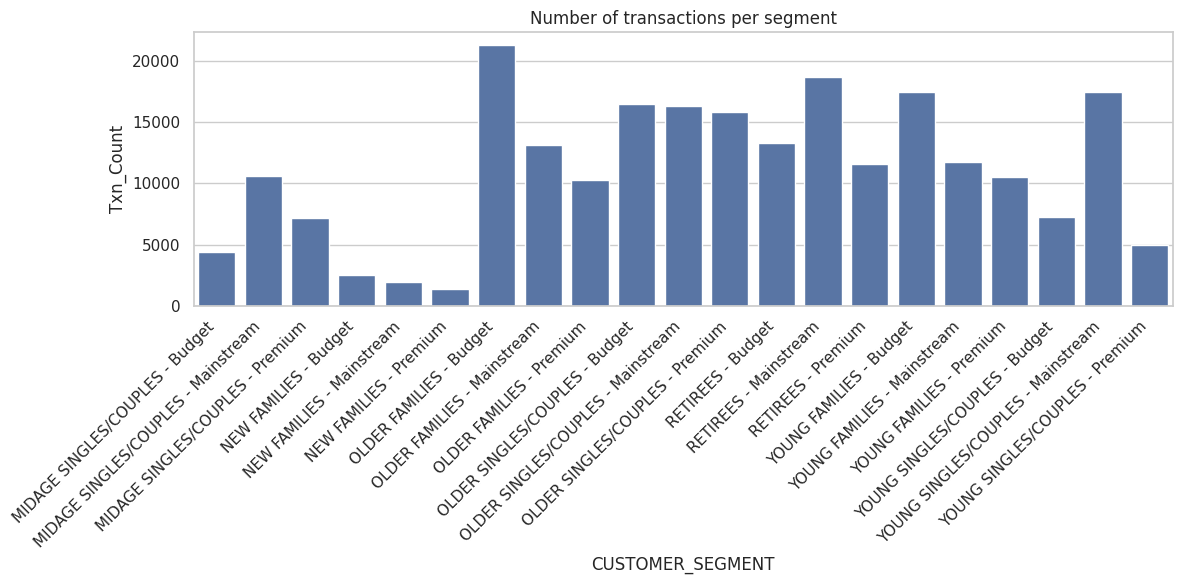

In [21]:
txn_count = df.groupby('CUSTOMER_SEGMENT')['TXN_ID'].nunique().reset_index(name='Txn_Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=txn_count, x='CUSTOMER_SEGMENT', y='Txn_Count')
plt.title('Number of transactions per segment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


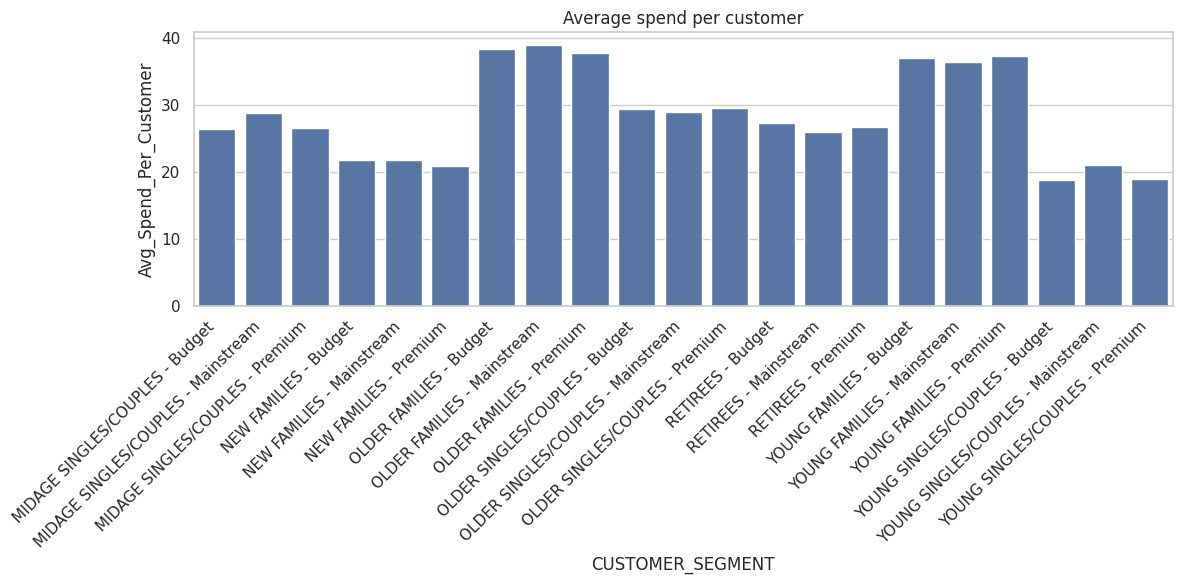

In [22]:
avg_spend_per_customer = total_spend.merge(unique_customers, on='CUSTOMER_SEGMENT')
avg_spend_per_customer['Avg_Spend_Per_Customer'] = avg_spend_per_customer['Total_Spend'] / avg_spend_per_customer['Num_Customers']

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_spend_per_customer, x='CUSTOMER_SEGMENT', y='Avg_Spend_Per_Customer')
plt.title('Average spend per customer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


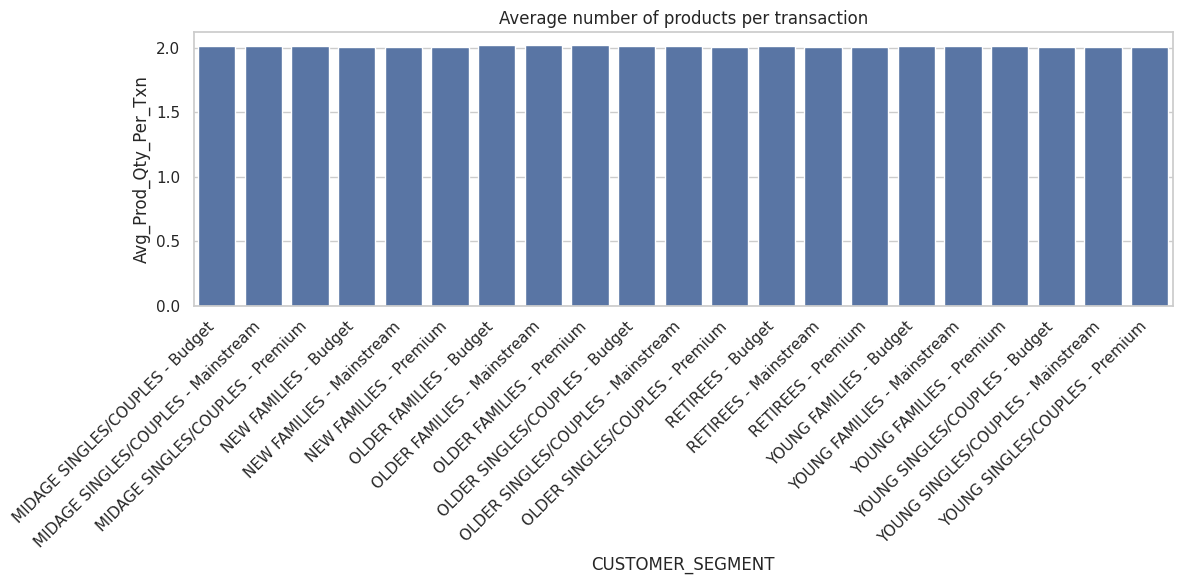

In [23]:
prod_qty_txn = df.groupby(['CUSTOMER_SEGMENT', 'TXN_ID'])['PROD_QTY'].sum().reset_index()
avg_qty_per_txn = prod_qty_txn.groupby('CUSTOMER_SEGMENT')['PROD_QTY'].mean().reset_index(name='Avg_Prod_Qty_Per_Txn')

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_qty_per_txn, x='CUSTOMER_SEGMENT', y='Avg_Prod_Qty_Per_Txn')
plt.title('Average number of products per transaction')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


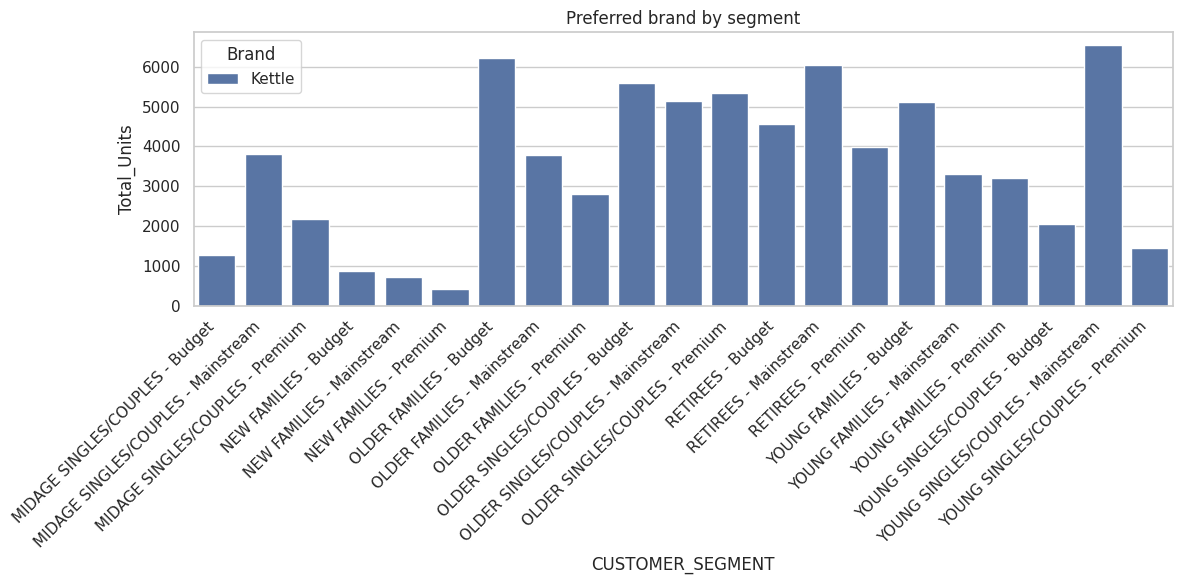

In [24]:
top_brands = df.groupby(['CUSTOMER_SEGMENT', 'BRAND'])['PROD_QTY'].sum().reset_index()
top_brands = top_brands.sort_values(['CUSTOMER_SEGMENT', 'PROD_QTY'], ascending=[True, False])
top_brands = top_brands.groupby('CUSTOMER_SEGMENT').head(1).rename(columns={'BRAND': 'Top_Brand', 'PROD_QTY': 'Total_Units'})

plt.figure(figsize=(12, 6))
sns.barplot(data=top_brands, x='CUSTOMER_SEGMENT', y='Total_Units', hue='Top_Brand')
plt.title('Preferred brand by segment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Brand')
plt.tight_layout()
plt.show()


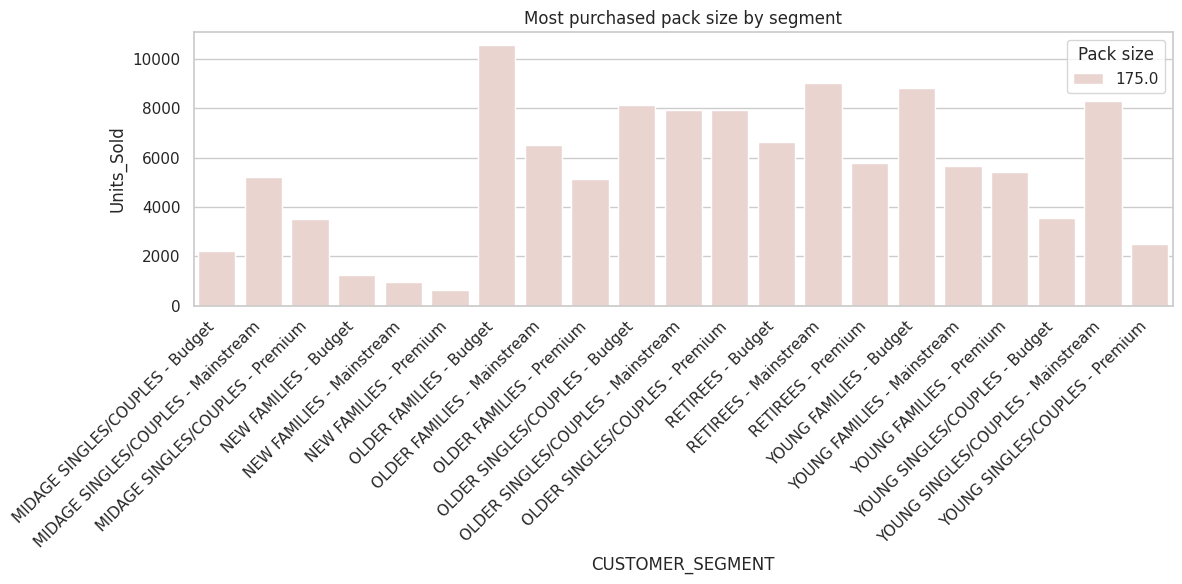

In [25]:
top_pack_size = df.groupby(['CUSTOMER_SEGMENT', 'PACK_SIZE'])['PROD_QTY'].sum().reset_index()
top_pack_size = top_pack_size.sort_values(['CUSTOMER_SEGMENT', 'PROD_QTY'], ascending=[True, False])
top_pack_size = top_pack_size.groupby('CUSTOMER_SEGMENT').head(1).rename(columns={'PACK_SIZE': 'Top_Pack_Size', 'PROD_QTY': 'Units_Sold'})

plt.figure(figsize=(12, 6))
sns.barplot(data=top_pack_size, x='CUSTOMER_SEGMENT', y='Units_Sold', hue='Top_Pack_Size')
plt.title('Most purchased pack size by segment')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pack size')
plt.tight_layout()
plt.show()


In [26]:
df.to_csv('processed_data.csv', index=False)

# Key insights from the analysis:

1. Key customer segments in terms of number and total spending:
The "Number of customers per segment" and "Total spending per segment" charts show that the segments with the largest number of customers and highest total spending are:
- Older families - Budget
- Young singles/couples - Mainstream
- Retirees - Mainstream
- Young families - Mainstream

These segments represent a significant portion of the customer base and total sales, making them important for targeting.

2. Average Spend Per Customer:
The "Average Spend Per Customer" graph shows that some segments, such as:
- Older Families - Budget
- Older Families - Mainstream
- Younger Families - Budget

have higher average spend per customer, although they may not be the largest in total numbers, indicating that these customers spend more per visit.

3. Average Number of Products Per Transaction:
The "Average Number of Products Per Transaction" graph indicates that most segments purchase a similar amount of products per transaction (around 2), indicating that basket size does not vary significantly between segments.

4. Preferred Brand and Most Purchased Pack Size:
The "Preferred Brand by Segment" and "Most Purchased Pack Size by Segment" graphs show that there are certain preferences for brands and pack sizes within each segment. For example, many customers prefer the "Kettle" brand and the "175.0" gram pack size.

Strategic Recommendations:

1. Focus on high-volume, high-spending segments:
- Since these segments represent a significant share of customers and total sales, marketing strategies and promotions must continue to target them effectively.
- Marketing campaigns can be designed to target these large segments with offers and discounts on their favorite potato chip products to increase sales volume.

2. Incentivize increased spending per customer in segments with high average spending:
- Loyalty programs or exclusive offers can be designed for these segments to increase their loyalty and motivate them to increase repeat purchases or purchase larger quantities.
- Offer "buy 2, get 1 free" offers or discounts on multiple purchases to increase transaction value for these segments.

3. Leverage brand and pack size preferences:
- Ensure that sufficient stock of preferred brands and the most popular pack sizes is available in all stores.
This information can be used to improve inventory management and negotiate with suppliers to obtain better prices for top-selling brands and pack sizes.

4. Explore growth opportunities in segments with untapped potential:
- Although some segments may not be the largest currently, analyzing the reasons for their low participation may reveal growth opportunities.
- Conduct further research to better understand the needs of these segments, then design specific products or marketing campaigns to attract them and increase their spending on potato chips.

Summary and Recommendation:

To maximize the potato chips market, a dual strategy must be implemented:

1. Enhance loyalty and increase basket value for existing key customers from the highest-spending segments through targeted offers and consistently providing their favorite products.
2. Explore and develop growth opportunities in segments with untapped potential by understanding their needs more deeply and providing tailored value propositions.